In [41]:
import pandas as pd
import numpy as np 
import csv
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
stops = r"/Users/phamthiphuongthuy/Desktop/Unimelb/Y2S1/EODP/eodp_a2/A2 datasets/stops_vista_2023_2024.csv"
trips = r"/Users/phamthiphuongthuy/Desktop/Unimelb/Y2S1/EODP/eodp_a2/A2 datasets/trips_vista_2023_2024.csv"

In [43]:
stops = pd.read_csv(stops, on_bad_lines='skip')
trips = pd.read_csv(trips, on_bad_lines='skip')
stops = pd.DataFrame(stops)
trips = pd.DataFrame(trips)

/var/folders/2f/l2t6rv7j4pjfjqq_ymr89c2r0000gn/T/ipykernel_73476/1344047643.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  stops = pd.read_csv(stops, on_bad_lines='skip')
/var/folders/2f/l2t6rv7j4pjfjqq_ymr89c2r0000gn/T/ipykernel_73476/1344047643.py:2: DtypeWarning: Columns (18,19,33) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = pd.read_csv(trips, on_bad_lines='skip')


In [44]:
trips.head(5)

,tripid,hhid,persid,tripno,starthour,startime,arrhour,arrtime,origplace1,origplace2,...,trippoststratweight_GROUP_4,trippoststratweight_GROUP_5,trippoststratweight_GROUP_6,trippoststratweight_GROUP_7,trippoststratweight_GROUP_8,trippoststratweight_GROUP_9,trippoststratweight_GROUP_10,homesubregion_ASGS,homeregion_ASGS,dayType
0,Y24H5740102P01T01,Y24H5740102,Y24H5740102P01,1,13,809,13,813,Accommodation,Survey Home,...,1386.611796,1398.142956,0.0,1273.620375,1212.280624,1075.46648,1857.769283,MELB - Outer,Greater Melbourne,Weekday
1,Y24H5740102P01T02,Y24H5740102,Y24H5740102P01,2,13,823,13,828,Retail venue,Shopping Centre,...,1386.611796,1398.142956,0.0,1273.620375,1212.280624,1075.46648,1857.769283,MELB - Outer,Greater Melbourne,Weekday
2,Y24H5740102P01T03,Y24H5740102,Y24H5740102P01,3,16,965,16,1000,Accommodation,Survey Home,...,1386.611796,1398.142956,0.0,1273.620375,1212.280624,1075.46648,1857.769283,MELB - Outer,Greater Melbourne,Weekday
3,Y24H5740102P01T04,Y24H5740102,Y24H5740102P01,4,16,1003,17,1056,Retail venue,Hardware,...,1386.611796,1398.142956,0.0,1273.620375,1212.280624,1075.46648,1857.769283,MELB - Outer,Greater Melbourne,Weekday
4,Y24H5740102P01T05,Y24H5740102,Y24H5740102P01,5,19,1147,19,1189,Personal services,Hospital,...,1386.611796,1398.142956,0.0,1273.620375,1212.280624,1075.46648,1857.769283,MELB - Outer,Greater Melbourne,Weekday


In [45]:
def categorize_mode(mode):
    if mode in ['Train', 'Public Bus', 'Tram', 'School Bus', 'Plane']:
        return 'Public'
    elif mode in ['Vehicle Driver', 'Vehicle Passenger', 'Motorcycle', 'Taxi', 'Mobility Scooter']:
        return 'Private'
    elif mode in ['Walking', 'Bicycle', 'Running/jogging', 'e-Scooter']:
        return 'Active'
    else:
        return 'Other'

trips['transport_mode'] = trips['linkmode'].apply(categorize_mode)


In [46]:
print("Transport category distribution:")
print(trips['transport_mode'].value_counts())

Transport category distribution:
transport_mode
Private    19090
Active      4066
Public      1187
Other        114
Name: count, dtype: int64


/var/folders/2f/l2t6rv7j4pjfjqq_ymr89c2r0000gn/T/ipykernel_73476/992008905.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=trips, x='transport_mode', order=trips['transport_mode'].value_counts().index, palette='Set2')


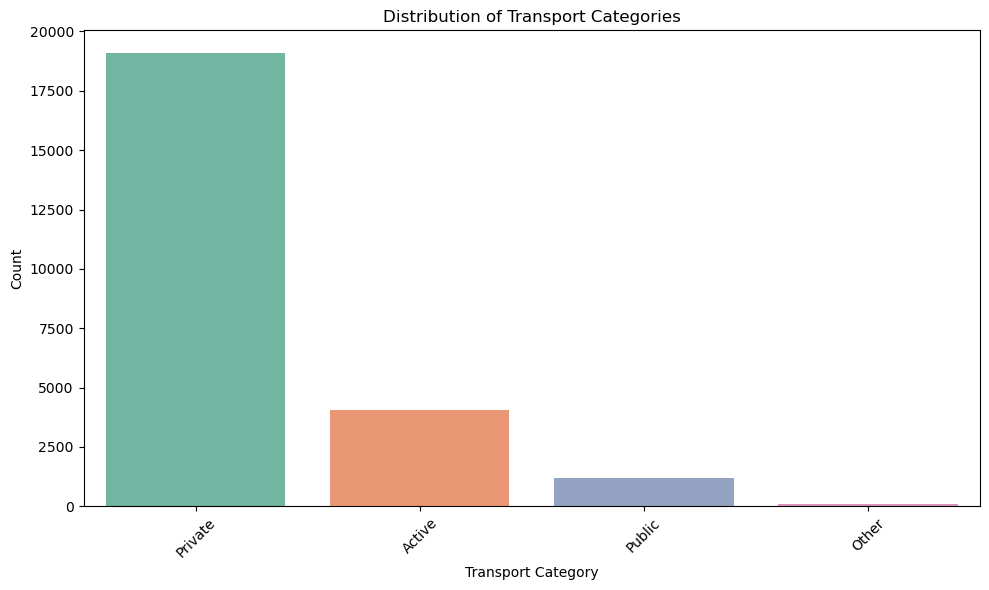

In [47]:
#clean nan values from trips dataframe
trips = trips.dropna(subset=['transport_mode'])

# Plotting the distribution of transport categories
plt.figure(figsize=(10, 6))
sns.countplot(data=trips, x='transport_mode', order=trips['transport_mode'].value_counts().index, palette='Set2')
plt.title('Distribution of Transport Categories')
plt.xlabel('Transport Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
columns_to_extract = [
        'tripid', 'hhid', 'persid', 'tripno', 'trippoststratweight', 
        'transport_mode', 'cumdist', 'linkmode',
        'homesubregion_ASGS', 'homeregion_ASGS'
    ]

# Extract the specified columns and save to a CSV file
prefer_trips = trips[columns_to_extract]
prefer_trips.to_csv("prefer_trips.csv", index=False)